# Error Propagation
This script generates the Tangle data set with uncertainties based on error propagation.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nibabel
import ipywidgets as widgets

\begin{align}
    f(x, y, z, r) &= x^4 - r x^2 + y^4 - 5 y^2 + z^4 - 5 z^2 + 11.8 \\
    \frac{df}{dr} &= -x^2
\end{align}

In [2]:
def tangle(x, y, z, r):
    return x**4 - r * x**2 + y**4 - 5 * y**2 + z**4 - 5 * z**2 + 11.8

def tangle_dr(x, y, z, r):
    return -x**2

In [3]:
resolution = 128

x = np.linspace(-2.5, 2.5, resolution)
y = np.linspace(-2.5, 2.5, resolution)
z = np.linspace(-2.5, 2.5, resolution)

xx, yy, zz = np.meshgrid(x, y, z)

mu_r = 5.0
std_r = 0.1

tangle_mean = tangle(xx, yy, zz, mu_r)
tangle_variance = ( tangle_dr(xx, yy, zz, mu_r) * std_r )**2

@widgets.interact(z=(0, len(z) - 1, 1), c=(-1., 1., 0.01), r=(0., 10.))
def explore_tangle(z=resolution//2, c=-0.7):

    plt.figure(figsize=(18,6))
    plt.subplot(1,2,1)
    plt.title('mean')
    plt.imshow(tangle_mean[z, :, :], extent=[x[0], x[-1], y[0], y[-1]], vmin=np.min(tangle_mean), vmax=np.max(tangle_mean))
    plt.colorbar()
    plt.contour(x, y, tangle_mean[z,:,:], levels=[c])

    plt.subplot(1,2,2)
    plt.title('variance')
    plt.imshow(tangle_variance[z, :, :], extent=[x[0], x[-1], y[0], y[-1]], vmin=np.min(tangle_variance), vmax=np.max(tangle_variance))
    plt.colorbar()
    plt.contour(x, y, tangle_mean[z,:,:], levels=[c])

    plt.show()

interactive(children=(IntSlider(value=64, description='z', max=127), FloatSlider(value=-0.7, description='c', …

In [5]:
np.save('../../Data/Tangle/error propagation/mean-resolution-{:d}-mu_r-{:g}-std_r-{:g}.npy'.format(resolution, mu_r, std_r), tangle_mean)
np.save('../../Data/Tangle/error propagation//variance-resolution-{:d}-mu_r-{:g}-std_r-{:g}.npy'.format(resolution, mu_r, std_r), tangle_variance)

tangle_mean.tofile('../../Data/Tangle/error propagation/mean-resolution-{:d}-mu_r-{:g}-std_r-{:g}.raw'.format(resolution, mu_r, std_r))
tangle_variance.tofile('../../Data/Tangle/error propagation/variance-resolution-{:d}-mu_r-{:g}-std_r-{:g}.raw'.format(resolution, mu_r, std_r))

affine = np.eye(4)
nifti_file = nibabel.Nifti1Image(tangle_mean, affine)
nibabel.save(nifti_file, '../../Data/Tangle/error propagation//mean-resolution-{:d}-mu_r-{:g}-std_r-{:g}.nii'.format(resolution, mu_r, std_r))

nifti_file = nibabel.Nifti1Image(tangle_variance, affine)
nibabel.save(nifti_file, '../../Data/Tangle/error propagation//variance-resolution-{:d}-mu_r-{:g}-std_r-{:g}.nii'.format(resolution, mu_r, std_r))

# 2D histogram

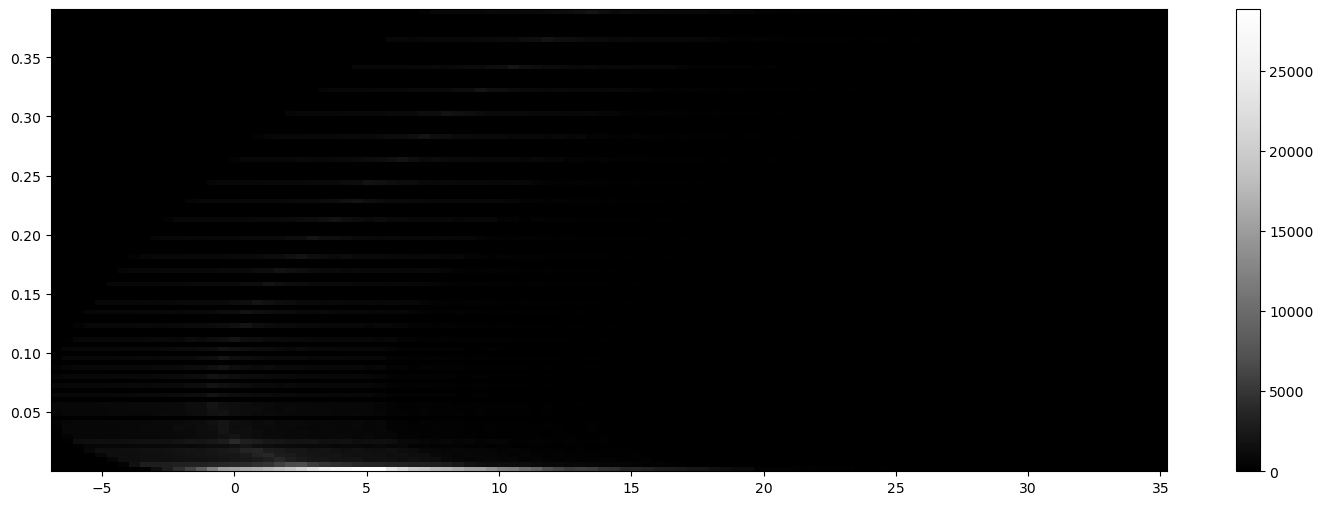

In [13]:
plt.figure(figsize=(18,6))
plt.hist2d(tangle_mean.flatten(), tangle_variance.flatten(), bins=100, cmap='Greys_r')
plt.colorbar()
plt.show()